# Инициализация и подготовка данных

In [1]:
from datetime import timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ----------------
# ----------------

input_year = 2006

# ----------------
# ----------------

In [3]:
sns.set_style("dark")
sns.set()

In [4]:
file = 'df4eda2clean2.csv'
df = pd.read_csv(file, index_col=0)
df

,ProductID,Units,Revenue_T,Category,ManufacturerID_x,IsCompete,MonthNo,Year,City,State
0,981,12,31676.40,Urban,8,No,12,2014,"Newington, CT",CT
1,1086,7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA
2,1085,7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA
3,489,3,35010.36,Urban,7,Yes,12,2014,"Melbourne, FL",FL
4,1989,3,16441.11,Rural,4,No,12,2014,"Saint George, UT",UT
...,...,...,...,...,...,...,...,...,...,...
1048570,990,1,5291.37,Urban,8,No,4,2002,"Islip Terrace, NY",NY
1048571,990,1,5291.37,Urban,8,No,4,2002,"Waynesboro, MS",MS
1048572,2169,1,6614.37,Urban,14,No,4,2002,"Bremerton, WA",WA
1048573,1144,1,4976.37,Urban,10,Yes,4,2002,"Felton, CA",CA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ProductID         1048575 non-null  int64  
 1   Units             1048575 non-null  int64  
 2   Revenue_T         1048534 non-null  float64
 3   Category          1048575 non-null  object 
 4   ManufacturerID_x  1048575 non-null  int64  
 5   IsCompete         1048575 non-null  object 
 6   MonthNo           1048575 non-null  int64  
 7   Year              1048575 non-null  int64  
 8   City              1048575 non-null  object 
 9   State             1048575 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 88.0+ MB


In [6]:
# узнаю, сколько всего уникальных продуктов за всю историю было
df['ProductID'].nunique()

1790

In [7]:
# посмотрю какие года и выберу последний полный для анализа
df['Year'].unique

<bound method Series.unique of 0          2014
1          2014
2          2014
3          2014
4          2014
           ... 
1048570    2002
1048571    2002
1048572    2002
1048573    2002
1048574    2002
Name: Year, Length: 1048575, dtype: int64>

# XYZ анализ

## Рассчитать ежемесячные продажи по ProductID

In [8]:
# соответственно для анализа беру 2013. 2014 можно будет потом тоже посмотреть конечно
df = df[df['Year']==input_year]

In [9]:
# посмотрю, сколько из всего многообразия продуктов компании осталось в этом году.
df['ProductID'].nunique()

707

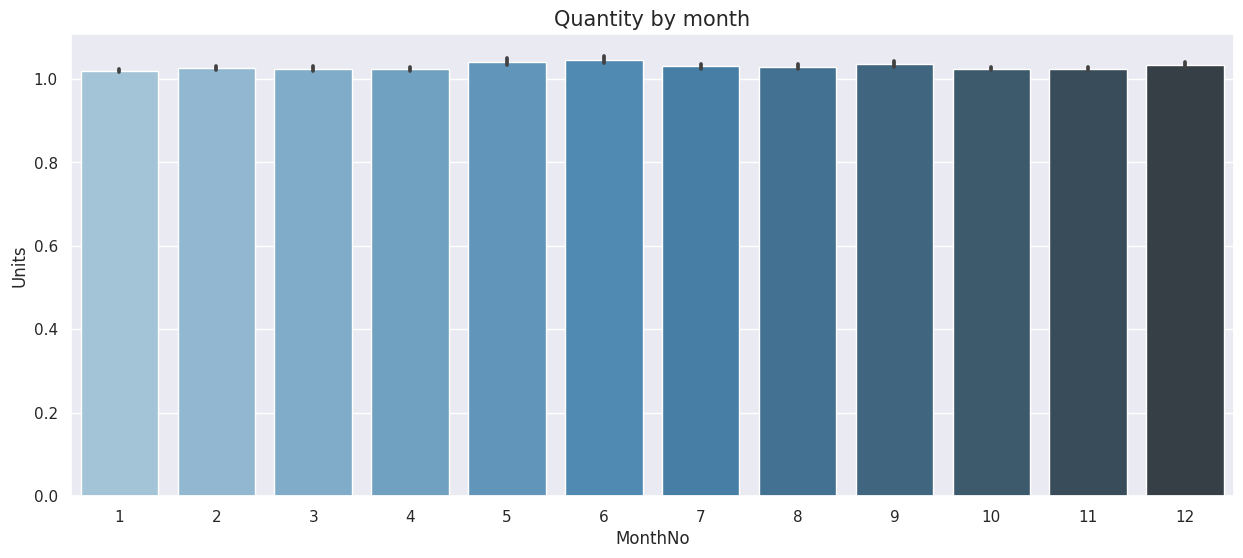

In [10]:
# обзор сезонности, по среднему количеству проданных всех товаров по месяцам
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="MonthNo", 
                 y="Units", 
                 data=df,
                 palette="Blues_d")\
                .set_title("Quantity by month",fontsize=15)

In [11]:
# и это же описательной статистикой
# Это функция агрегирования, по столбцу 'all' посчитать статистические данные
agg_func_math = {
    'Units': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'prod']
}

# группирую по дате (месяц-год) и считаю статистические величины и все округляю до второго знака
df_units_stat = df.groupby(['MonthNo']).agg(agg_func_math).round(2)

# посмотрю что получилось
df_units_stat

Units                                      
           sum  mean median min max   std   var prod
MonthNo                                             
1         9978  1.02    1.0   1  12  0.20  0.04    0
2        10069  1.03    1.0   1  10  0.26  0.07    0
3         9985  1.02    1.0   1  20  0.32  0.10    0
4         7659  1.02    1.0   1   9  0.20  0.04    0
5         7514  1.04    1.0   1  26  0.37  0.14    0
6        11145  1.05    1.0   1  27  0.41  0.17    0
7         5999  1.03    1.0   1   9  0.25  0.06    0
8         6826  1.03    1.0   1   9  0.25  0.06    0
9        11775  1.04    1.0   1  21  0.41  0.17    0
10       13903  1.02    1.0   1   9  0.20  0.04    0
11       15055  1.03    1.0   1  14  0.22  0.05    0
12       13045  1.03    1.0   1  30  0.38  0.15    0

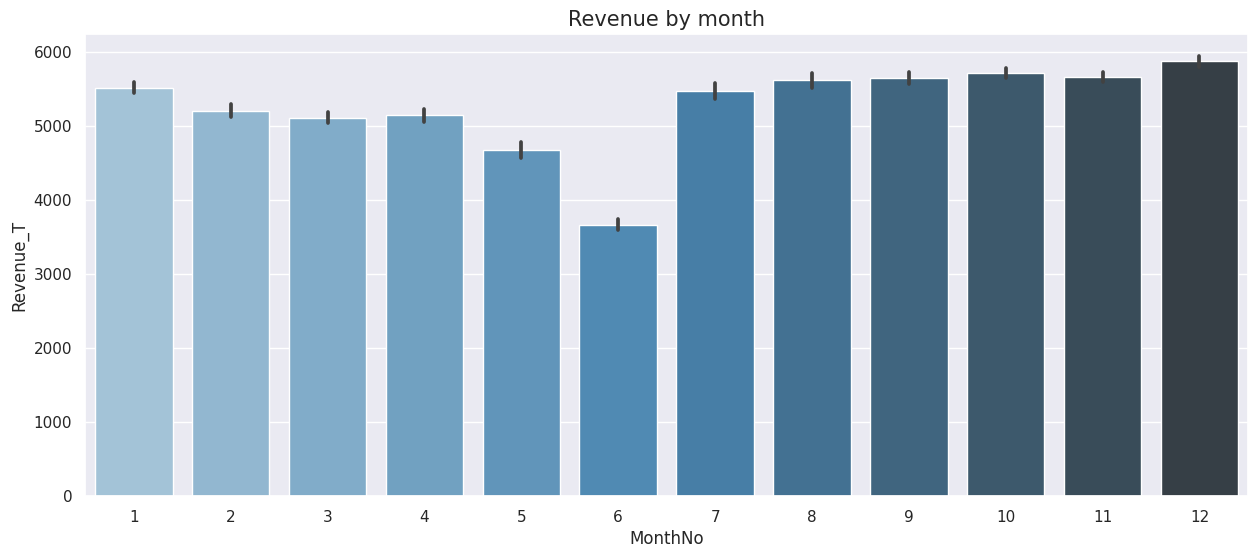

In [12]:
# обзор сезонности по прибыли, по средней прибыли всех товаров по месяцам
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="MonthNo", 
                 y="Revenue_T", 
                 data=df,
                 palette="Blues_d")\
                .set_title("Revenue by month",fontsize=15)

In [13]:
# и это же описательной статистикой
# Это функция агрегирования, по столбцу 'Units' посчитать статистические данные
agg_func_math = {
    'Revenue_T': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'prod']
}

# группирую по дате (месяц-год) и считаю статистические величины и все округляю до второго знака
df_Revenue_T_stat = df.groupby(['MonthNo']).agg(agg_func_math).round(2)

# посмотрю что получилось
df_Revenue_T_stat

Revenue_T                                                \
                 sum     mean   median     min        max      std   
MonthNo                                                              
1        53987369.94  5517.92  4784.85  679.77   66887.10  3861.93   
2        51123505.86  5206.59  4283.37  679.77  103320.00  4055.42   
3        49782774.51  5108.55  4220.37  679.77   38650.50  3698.20   
4        38454733.17  5142.38  4157.37  679.77   39280.50  3916.50   
5        33798821.49  4678.04  3747.87  679.77  111367.62  4201.42   
6        39093360.39  3667.98  1951.74  679.77  107145.99  3973.03   
7        31858972.11  5472.17  4283.37  679.77   68814.90  4123.85   
8        37254398.58  5615.68  4409.37  679.77   70704.90  4156.26   
9        64153288.08  5644.32  4535.37  679.77  164776.50  4429.58   
10       77620442.76  5718.74  5084.10  679.77   59846.85  3858.00   
11       83074808.25  5656.35  5036.85  679.77   92606.22  3837.96   
12       74077930.08  5871.74  5354.37  679.77  153521.55  4164.11   

                           
                 var prod  
MonthNo                    
1        14914509.05  inf  
2        16446470.60  inf  
3        13676648.80  inf  
4        15338970.25  inf  
5        17651896.58  inf  
6        15784986.71  inf  
7        17006120.65  inf  
8        17274513.03  inf  
9        19621188.19  inf  
10       14884150.91  inf  
11       14729951.37  inf  
12       17339793.72  inf

In [14]:
# Далее группировка по ProductID
df_units = df.groupby(['ProductID','MonthNo'])['Units'].sum().to_frame().reset_index()
df_units

,ProductID,MonthNo,Units
0,3,10,11
1,3,11,10
2,3,12,7
3,4,3,2
4,4,4,6
...,...,...,...
5904,2412,8,13
5905,2412,9,13
5906,2412,10,41
5907,2412,11,78


In [15]:
# сводной таблицей приведу к длинному типу таблицы
df_units = df_units.pivot(index='ProductID',
                                  columns='MonthNo',
                                  values='Units').add_prefix('m').reset_index().fillna(0)
df_units

MonthNo,ProductID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,7.0
1,4,0.0,0.0,2.0,6.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0
2,8,2.0,2.0,4.0,1.0,7.0,7.0,3.0,4.0,18.0,24.0,15.0,22.0
3,26,19.0,19.0,29.0,16.0,18.0,14.0,20.0,7.0,23.0,21.0,22.0,19.0
4,31,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2402,16.0,27.0,50.0,14.0,9.0,7.0,6.0,5.0,13.0,29.0,32.0,24.0
703,2404,0.0,0.0,1.0,7.0,3.0,1.0,3.0,4.0,2.0,6.0,6.0,10.0
704,2406,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,2407,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Рассчитать стандартное отклонение спроса

In [16]:
# добавить стандартное отклонение спроса
df_units['std_demand'] = df_units[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']].std(axis=1)
df_units

MonthNo,ProductID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,7.0,4.313474
1,4,0.0,0.0,2.0,6.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,1.676486
2,8,2.0,2.0,4.0,1.0,7.0,7.0,3.0,4.0,18.0,24.0,15.0,22.0,8.349832
3,26,19.0,19.0,29.0,16.0,18.0,14.0,20.0,7.0,23.0,21.0,22.0,19.0,5.299371
4,31,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2402,16.0,27.0,50.0,14.0,9.0,7.0,6.0,5.0,13.0,29.0,32.0,24.0,13.472756
703,2404,0.0,0.0,1.0,7.0,3.0,1.0,3.0,4.0,2.0,6.0,6.0,10.0,3.117643
704,2406,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.443376
705,2407,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887625


## Рассчитать общий спрос

In [17]:
# добавить колонку общего спроса

# выберу из массива только столбцы со спросом по месяцам
df_units_m = df_units.drop(['ProductID', 'std_demand'], axis = 1)
# по выбранному массиву сделаю сумму по строку и полученный столбец сохраню в исходну таблицу
df_units['total_demand'] = df_units_m.sum(axis = 1)
# посмотрю что получается
df_units

MonthNo,ProductID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,7.0,4.313474,28.0
1,4,0.0,0.0,2.0,6.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,1.676486,17.0
2,8,2.0,2.0,4.0,1.0,7.0,7.0,3.0,4.0,18.0,24.0,15.0,22.0,8.349832,109.0
3,26,19.0,19.0,29.0,16.0,18.0,14.0,20.0,7.0,23.0,21.0,22.0,19.0,5.299371,227.0
4,31,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389249,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2402,16.0,27.0,50.0,14.0,9.0,7.0,6.0,5.0,13.0,29.0,32.0,24.0,13.472756,232.0
703,2404,0.0,0.0,1.0,7.0,3.0,1.0,3.0,4.0,2.0,6.0,6.0,10.0,3.117643,43.0
704,2406,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.443376,5.0
705,2407,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887625,4.0


## Рассчитать среднемесячный спрос

In [18]:
# Среднемесячный спрос
df_units = df_units.assign(avg_demand = df_units['total_demand'] / 12 )
df_units

MonthNo,ProductID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,7.0,4.313474,28.0,2.333333
1,4,0.0,0.0,2.0,6.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,1.676486,17.0,1.416667
2,8,2.0,2.0,4.0,1.0,7.0,7.0,3.0,4.0,18.0,24.0,15.0,22.0,8.349832,109.0,9.083333
3,26,19.0,19.0,29.0,16.0,18.0,14.0,20.0,7.0,23.0,21.0,22.0,19.0,5.299371,227.0,18.916667
4,31,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389249,2.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2402,16.0,27.0,50.0,14.0,9.0,7.0,6.0,5.0,13.0,29.0,32.0,24.0,13.472756,232.0,19.333333
703,2404,0.0,0.0,1.0,7.0,3.0,1.0,3.0,4.0,2.0,6.0,6.0,10.0,3.117643,43.0,3.583333
704,2406,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.443376,5.0,0.416667
705,2407,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887625,4.0,0.333333


## Рассчитать коэффициент вариации спроса

Наконец, мы можем рассчитать степень изменения спроса на каждый SKU в течение года. Чтобы измерить вариацию и, следовательно, прогнозируемость, мы можем использовать расчет, называемый коэффициентом вариации или CV. Это средний спрос по отношению к стандартному отклонению спроса. Значение, близкое к нулю, означает, что существует минимальная вариация и более высокая предсказуемость, тогда как высокие значения подразумевают обратное.

In [19]:
# коэфициент вариации спроса
df_units['cov_demand'] = df_units['std_demand'] / df_units['avg_demand']
df_units

MonthNo,ProductID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,7.0,4.313474,28.0,2.333333,1.848632
1,4,0.0,0.0,2.0,6.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,1.676486,17.0,1.416667,1.183402
2,8,2.0,2.0,4.0,1.0,7.0,7.0,3.0,4.0,18.0,24.0,15.0,22.0,8.349832,109.0,9.083333,0.919248
3,26,19.0,19.0,29.0,16.0,18.0,14.0,20.0,7.0,23.0,21.0,22.0,19.0,5.299371,227.0,18.916667,0.280143
4,31,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389249,2.0,0.166667,2.335497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2402,16.0,27.0,50.0,14.0,9.0,7.0,6.0,5.0,13.0,29.0,32.0,24.0,13.472756,232.0,19.333333,0.696867
703,2404,0.0,0.0,1.0,7.0,3.0,1.0,3.0,4.0,2.0,6.0,6.0,10.0,3.117643,43.0,3.583333,0.870040
704,2406,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.443376,5.0,0.416667,3.464102
705,2407,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887625,4.0,0.333333,2.662876


In [20]:
# описательная статистика 
df_units.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthNo,,,,,,,,
ProductID,707.0,1295.530410,661.252781,3.000000,762.500000,1217.000000,1922.000000,2412.000000
m1,707.0,14.113154,28.434532,0.000000,0.000000,3.000000,14.000000,268.000000
m2,707.0,14.241867,28.311642,0.000000,0.000000,3.000000,15.000000,279.000000
m3,707.0,14.123055,26.219122,0.000000,0.000000,3.000000,15.000000,197.000000
m4,707.0,10.833098,20.634287,0.000000,0.000000,3.000000,11.000000,192.000000
m5,707.0,10.628006,24.998503,0.000000,0.000000,2.000000,9.500000,297.000000
m6,707.0,15.763791,44.867314,0.000000,0.000000,3.000000,11.000000,496.000000
m7,707.0,8.485149,16.242610,0.000000,0.000000,2.000000,9.000000,154.000000
m8,707.0,9.654880,18.558681,0.000000,0.000000,2.000000,10.000000,156.000000


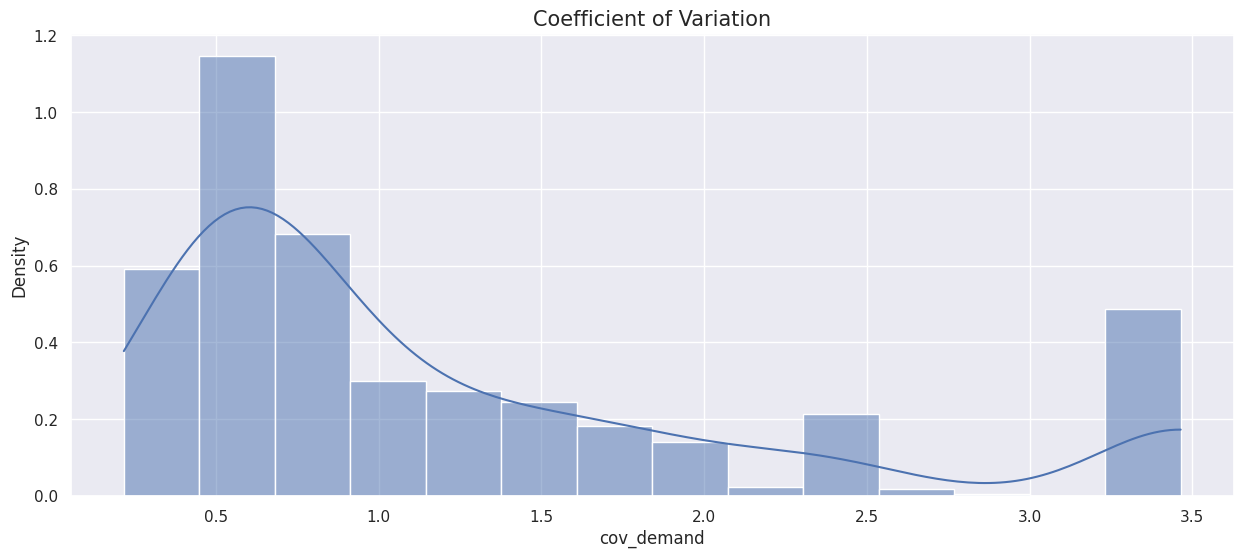

In [21]:
# Вот распределение CV по ассортименту продукции. Учитывая, что товары с CV больше 1 гораздо труднее предсказать
# из-за колебаний спроса, поддерживать в хорошем состоянии именно этот запас может быть относительно сложно, 
# если только компания не держит дорогостоящие резервные запасы.
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.histplot(df_units['cov_demand'], stat='density', kde='True').set_title("Coefficient of Variation",fontsize=15)

## Назначить классы XYZ

Как и при анализе запасов ABC, вы можете самостоятельно выбирать параметры для обозначения SKU в классы XYZ. Однако наиболее распространенным подходом является использование коэффициента вариации. Товары с CV 0,5 или ниже очень предсказуемы и имеют стабильные продажи круглый год, поэтому они относятся к классу X. Товары с CV от 0,5 до 1,0 менее предсказуемы и ими труднее управлять, поэтому они относятся к классу Y. Наконец, товары с CV от 0,5 до 1,0 менее предсказуемы и ими труднее управлять, поэтому они относятся к классу Y. , все, что имеет CV больше 1, относится к классу Z, поскольку его гораздо сложнее прогнозировать, и он подвержен колебаниям в течение года, часто потому, что он продается лишь время от времени.

In [22]:
def xyz_classify_product(cov):
    """Apply an XYZ classification to each product based on 
    its coefficient of variation in order quantity.

    :param cov: Coefficient of variation in order quantity for SKU
    :return: XYZ inventory classification class
    """

    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [23]:
df_units['xyz_class'] = df_units['cov_demand'].apply(xyz_classify_product)
df_units.xyz_class.value_counts()

Z    291
Y    270
X    146
Name: xyz_class, dtype: int64

## Изучение классов XYZ

Чтобы взглянуть на распределение классов XYZ, мы можем распечатать наш фрейм данных, а затем запустить агрегацию для расчета некоторой сводной статистики. Большинство ProductID, которые легко предсказать, имеют относительно низкий спрос, исходя из количества единиц. Именно те, что относятся к классам Y и Z, продаются в самых больших объемах.

In [24]:
df_units

MonthNo,ProductID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,7.0,4.313474,28.0,2.333333,1.848632,Z
1,4,0.0,0.0,2.0,6.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,1.676486,17.0,1.416667,1.183402,Z
2,8,2.0,2.0,4.0,1.0,7.0,7.0,3.0,4.0,18.0,24.0,15.0,22.0,8.349832,109.0,9.083333,0.919248,Y
3,26,19.0,19.0,29.0,16.0,18.0,14.0,20.0,7.0,23.0,21.0,22.0,19.0,5.299371,227.0,18.916667,0.280143,X
4,31,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389249,2.0,0.166667,2.335497,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2402,16.0,27.0,50.0,14.0,9.0,7.0,6.0,5.0,13.0,29.0,32.0,24.0,13.472756,232.0,19.333333,0.696867,Y
703,2404,0.0,0.0,1.0,7.0,3.0,1.0,3.0,4.0,2.0,6.0,6.0,10.0,3.117643,43.0,3.583333,0.870040,Y
704,2406,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.443376,5.0,0.416667,3.464102,Z
705,2407,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887625,4.0,0.333333,2.662876,Z


In [25]:
df_units.groupby('xyz_class').agg(
    total_productid=('ProductID', 'nunique'),
    total_demand=('total_demand', 'sum'),    
    std_demand=('std_demand', 'mean'),      
    avg_demand=('avg_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_productid,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,146,51697.0,11.340656,29.507420,0.400633
Y,270,64944.0,12.953644,20.044444,0.693740
Z,291,6312.0,2.789435,1.807560,2.154925


## Построить данные XYZ

Чтобы построить данные XYZ и понять, как спрос на каждый из классов меняется в течение года, нам нужно еще раз изменить форму наших данных. Мы создадим новый фрейм данных под названием df_monthlyи будем использовать groupby()функцию для группировки продуктов по их xyz_class, а затем просуммировать доход по месяцам.

In [26]:
df_monthly = df_units.groupby('xyz_class').agg(
    m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
    m6=('m6', 'sum'),
    m7=('m7', 'sum'),
    m8=('m8', 'sum'),
    m9=('m9', 'sum'),
    m10=('m10', 'sum'),
    m11=('m11', 'sum'),
    m12=('m12', 'sum'),
)

df_monthly

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
xyz_class,,,,,,,,,,,,
X,4448.0,4288.0,4177.0,3427.0,3326.0,4374.0,3022.0,3257.0,5097.0,5540.0,5657.0,5084.0
Y,4815.0,5373.0,5543.0,4064.0,4014.0,6521.0,2787.0,3275.0,6140.0,7563.0,8116.0,6733.0
Z,715.0,408.0,265.0,168.0,174.0,250.0,190.0,294.0,538.0,800.0,1282.0,1228.0


Для построения графика нам необходимо преобразовать данные из широкого формата в длинный формат, поэтому мы воспользуемся функцией unstack()для создания длинного кадра данных, затем сбросим индекс и переименуем столбцы в соответствии с базовыми данными.

In [27]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

,month,xyz_class,demand
0,m1,X,4448.0
1,m1,Y,4815.0
2,m1,Z,715.0
3,m2,X,4288.0
4,m2,Y,5373.0


График данных по классу X показывает, что спрос на эти продукты относительно устойчив в течение года. В менее сезонных компаниях, где SKU продаются по одинаковым ценам в течение всего года, мы ожидаем увидеть почти никаких изменений, но изменения здесь показывают, что у этого ритейлера действительно больше сезонных SKU, чем у большинства.

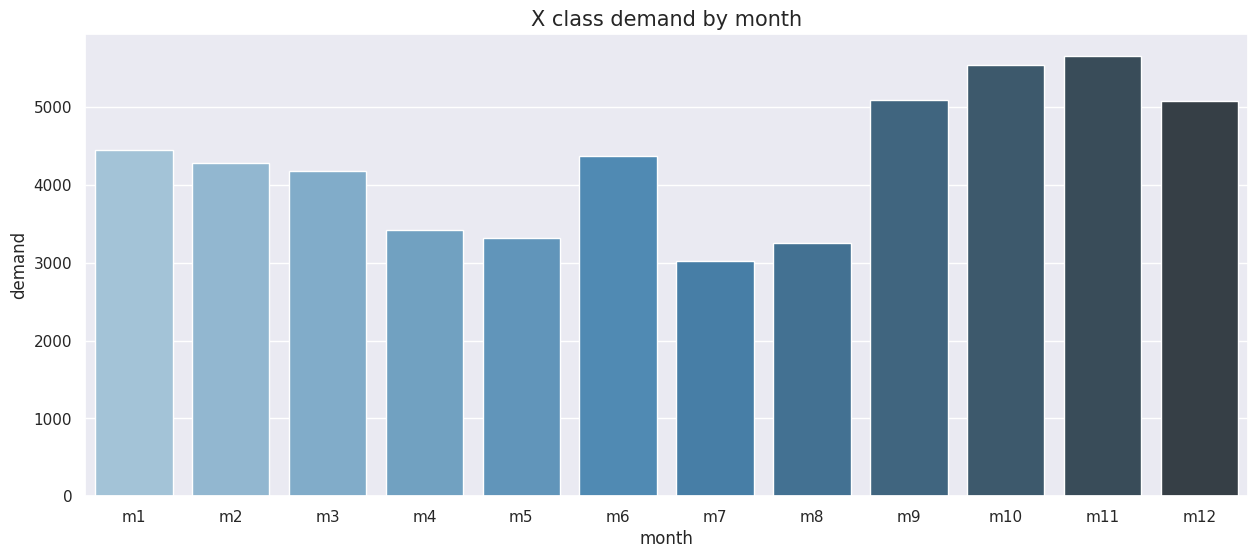

In [28]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='X'],
                 palette="Blues_d")\
                 .set_title("X class demand by month",fontsize=15)

Данные класса Y показывают, почему эти ProductID труднее контролировать. В начале года наблюдается снижение спроса, а в теплые месяцы происходит совсем сильное падение в спросе (при скачке в июне), а затем с наступлением осени продажи этих ProductID начинаю расти и к ноябрю достигаю пика.

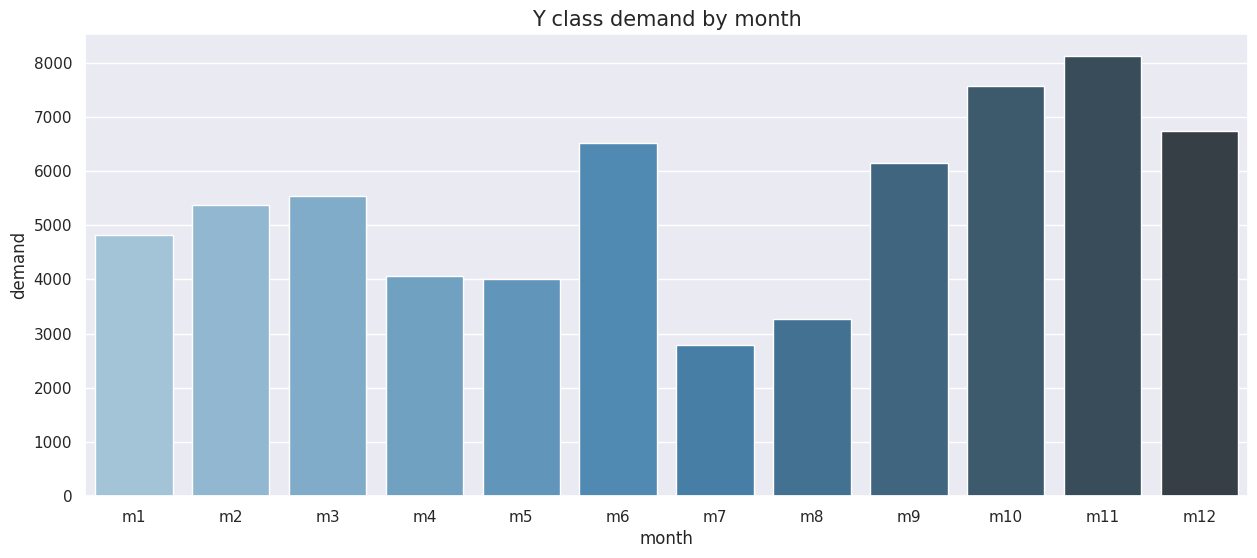

In [29]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Y'],
                 palette="Blues_d")\
                 .set_title("Y class demand by month",fontsize=15)

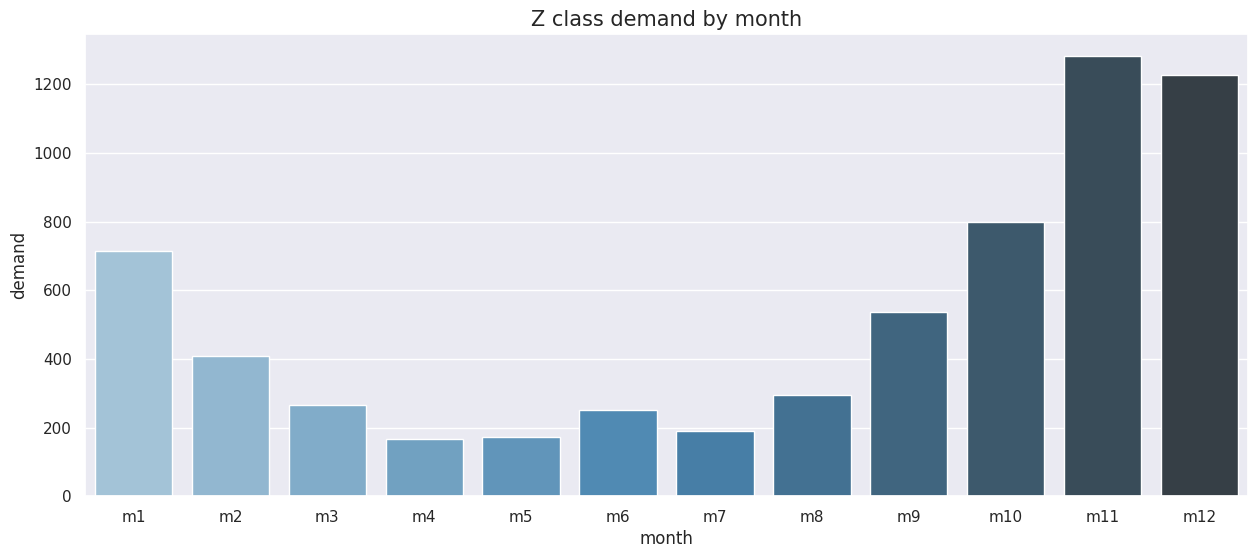

In [30]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Z'],
                 palette="Blues_d")\
                 .set_title("Z class demand by month",fontsize=15)

Здесь они все рядом. Действительно интересная вещь здесь, когда все они показаны в одном масштабе, заключается в том, что не только трудно предсказать ProductID классов Y и Z в летние месяцы, но и генерируемый всплеск спроса Y является огромным.

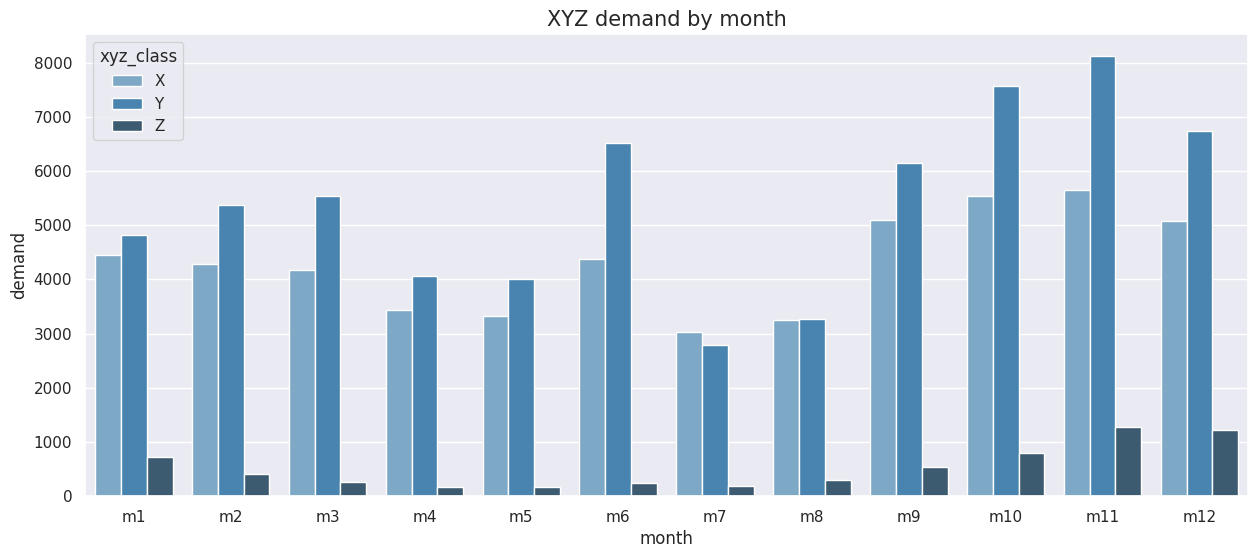

In [31]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 hue="xyz_class", 
                 data=df_monthly_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month",fontsize=15)

# ABC анализ запасов

Поскольку анализ XYZ рассматривает только объем спроса на единицу продукции, нам затем необходимо выполнить анализ запасов ABC, чтобы определить влияние каждого из них на доход. Мы повторно используем 12-месячный массив данных, который мы создали ранее, а затем запустим агрегирование для расчета показателей дохода для каждого ProductID.



In [32]:
df_products = df.groupby('ProductID').agg(
    unique_purchases=('ProductID', 'nunique'),
    total_units=('Units', 'sum'),
    total_revenue=('Revenue_T', 'sum'),
).sort_values(by='total_revenue', ascending=False).reset_index()
df_products

,ProductID,unique_purchases,total_units,total_revenue
0,475,1,2339,30343291.65
1,409,1,1779,20647802.70
2,551,1,1524,17487231.30
3,826,1,1181,14453912.97
4,396,1,1225,13823778.15
...,...,...,...,...
702,1330,1,1,1605.24
703,2211,1,1,1290.87
704,2210,1,1,1290.87
705,1003,1,1,1038.87


Чтобы рассчитать классы ABC, нам необходимо знать общий доход, полученный всеми ProductID, и совокупный процентный вклад в доход, полученный каждым ProductID. Чтобы это работало, очень важно, чтобы они были отсортированы в порядке убывания общего дохода, который они получили, как мы это сделали выше. Мы можем использовать эту cumsum()функцию для расчета совокупной суммы дохода, а затем рассчитать текущий процент дохода и сохранить его в кадре данных.

In [33]:
df_products['revenue_cumsum'] = df_products['total_revenue'].cumsum()
df_products['revenue_total'] = df_products['total_revenue'].sum()
df_products['revenue_running_percentage'] = (df_products['revenue_cumsum'] / df_products['revenue_total']) * 100
df_products

,ProductID,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage
0,475,1,2339,30343291.65,3.034329e+07,6.342804e+08,4.783892
1,409,1,1779,20647802.70,5.099109e+07,6.342804e+08,8.039204
2,551,1,1524,17487231.30,6.847833e+07,6.342804e+08,10.796223
3,826,1,1181,14453912.97,8.293224e+07,6.342804e+08,13.075012
4,396,1,1225,13823778.15,9.675602e+07,6.342804e+08,15.254455
...,...,...,...,...,...,...,...
702,1330,1,1,1605.24,6.342757e+08,6.342804e+08,99.999265
703,2211,1,1,1290.87,6.342770e+08,6.342804e+08,99.999469
704,2210,1,1,1290.87,6.342783e+08,6.342804e+08,99.999672
705,1003,1,1,1038.87,6.342794e+08,6.342804e+08,99.999836


Как и в случае с классификацией XYZ, мы создадим функцию, которая будет относить каждый продукт к соответствующему классу на основе его вклада в процентный доход. Я отнес ProductID, которые приносят верхние 80% дохода, к классу A, следующие 15% генераторов дохода — к классу B, а остальные — к классу C.

In [34]:
def abc_classify_product(percentage):
    """Apply an ABC classification to each product based on 
    its ranked percentage revenue contribution. Any split 
    can be used to suit your data. 

    :param percentage: Running percentage of revenue contributed
    :return: ABC inventory classification
    """

    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 95:
        return 'B'
    else:
        return 'C'

Затем применить abc_classify_product()вышеуказанную функцию и присвоить значение кадру данных. Одновременно полезно также рассчитать рейтинг продаж продукта, что можно сделать с помощью rank() функции.

In [35]:
df_products['abc_class'] = df_products['revenue_running_percentage'].apply(abc_classify_product)
df_products['abc_rank'] = df_products['revenue_running_percentage'].rank().astype(int)
df_products

,ProductID,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class,abc_rank
0,475,1,2339,30343291.65,3.034329e+07,6.342804e+08,4.783892,A,1
1,409,1,1779,20647802.70,5.099109e+07,6.342804e+08,8.039204,A,2
2,551,1,1524,17487231.30,6.847833e+07,6.342804e+08,10.796223,A,3
3,826,1,1181,14453912.97,8.293224e+07,6.342804e+08,13.075012,A,4
4,396,1,1225,13823778.15,9.675602e+07,6.342804e+08,15.254455,A,5
...,...,...,...,...,...,...,...,...,...
702,1330,1,1,1605.24,6.342757e+08,6.342804e+08,99.999265,C,703
703,2211,1,1,1290.87,6.342770e+08,6.342804e+08,99.999469,C,704
704,2210,1,1,1290.87,6.342783e+08,6.342804e+08,99.999672,C,705
705,1003,1,1,1038.87,6.342794e+08,6.342804e+08,99.999836,C,706


Если мы теперь рассмотрим статистику по каждому из классов, мы увидим, что у нас есть 133 класс А, приносящий 80% нашего дохода. В классе B их 175, которые генерируют следующие 15%, а затем еще 385 в классе C, которые генерируют нижние 5% продаж. Очевидно, что некоторые управленческие усилия можно сэкономить, сосредоточив внимание главным образом на ProductUD A и B, вместо того, чтобы увязнуть в гораздо более медленно продаваемых ProductUD класса C.

In [36]:
df_abc = df_products.groupby('abc_class').agg(
    total_products=('ProductID', 'nunique'),
    total_units=('total_units', sum),
    total_revenue=('total_revenue', sum),
).reset_index()

df_abc

,abc_class,total_products,total_units,total_revenue
0,A,146,82133,5.071197e+08
1,B,164,31546,9.523705e+07
2,C,397,9274,3.192369e+07


Вот как выглядят данные класса ABC с точки зрения дохода, полученного по каждому классу: вы можете увидеть использованное нами разделение 80/15/5.

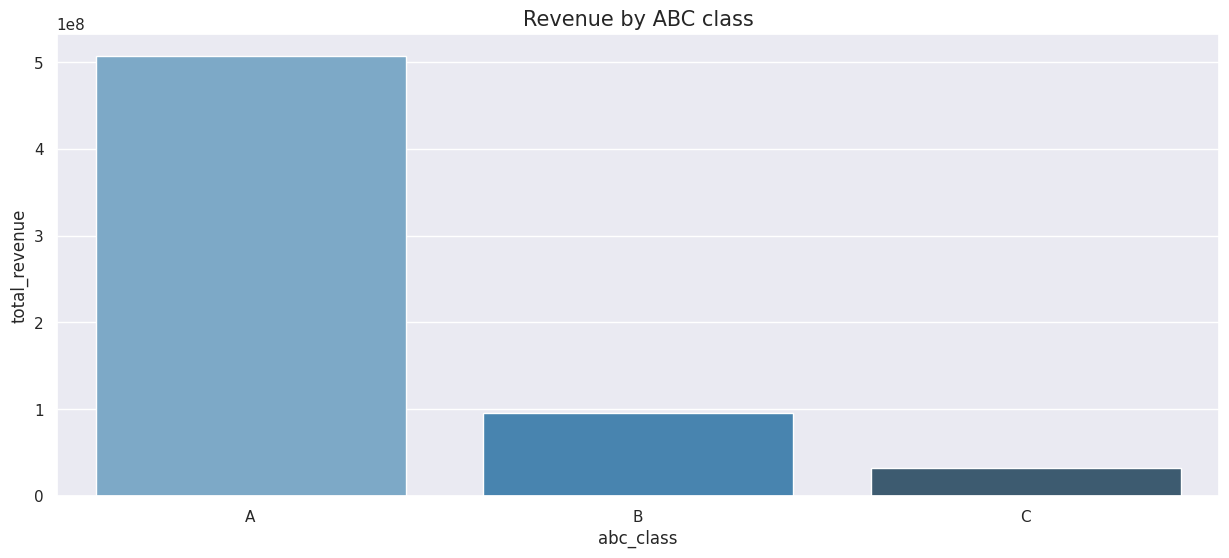

In [37]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_revenue", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Revenue by ABC class",fontsize=15)

Вопрос, насколько много в классе C есть ProductID, которые приносят только 5% общего дохода компании.

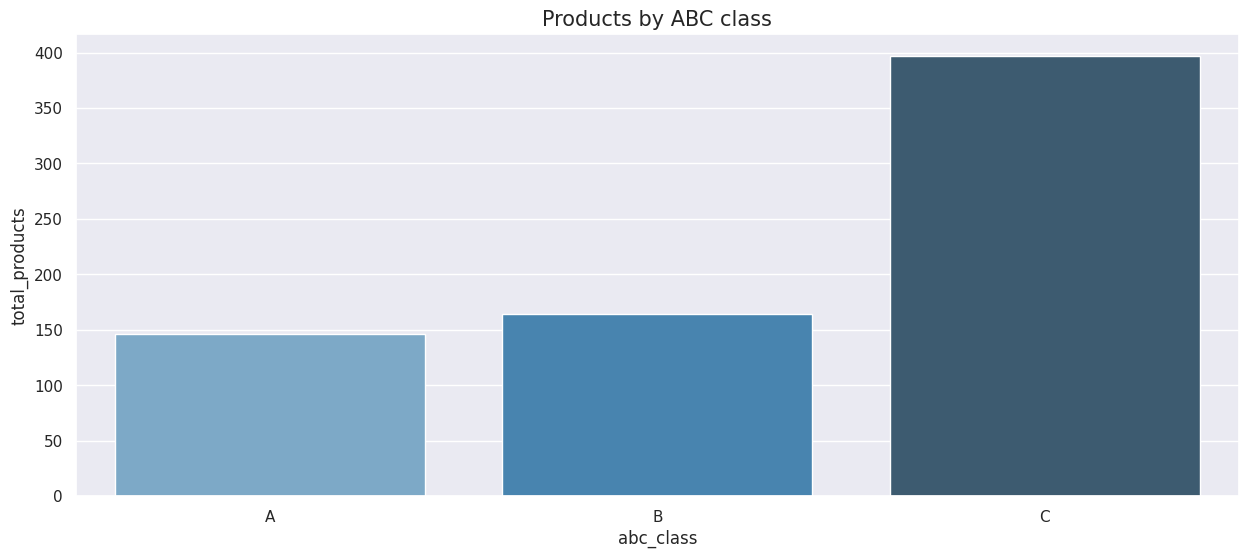

In [38]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_products", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Products by ABC class",fontsize=15)

Что касается первенства в количестве проданных единиц, очевидно, что это лоты класса А, поскольку они приносят 80% выручки. Однако есть также партии класса С, что говорит о том, что здесь много дешевых сезонных товаров или вещи, которые продаются только время от времени.

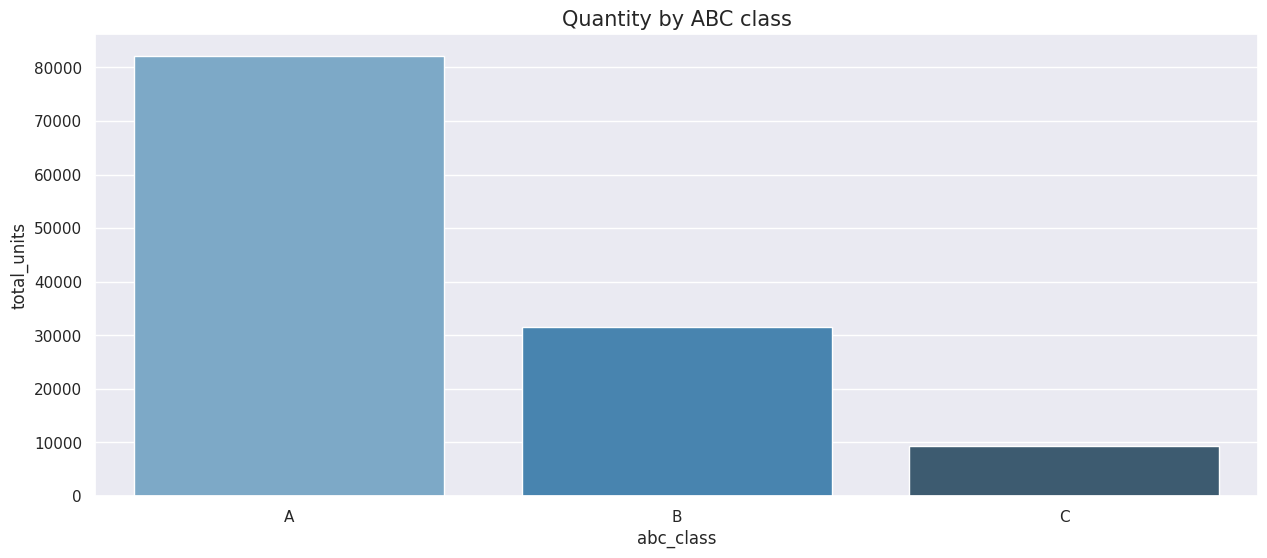

In [39]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_units", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Quantity by ABC class",fontsize=15)

# ABC-XYZ анализ запасов

Последний шаг — объединить данные управления запасами XYZ с данными управления запасами ABC. Мы выберем ключевые показатели, которые хотим сохранить из нашего ABC-анализа, и создадим новый фрейм данных, а затем присоединим его к данным анализа XYZ.

In [40]:
df_abc = df_products[['ProductID','abc_class','abc_rank','total_revenue']]
df_xyz = df_units.copy()
df_abc_xyz = df_abc.merge(df_xyz, on='ProductID', how='left')
df_abc_xyz

,ProductID,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,475,A,1,30343291.65,174.0,192.0,146.0,162.0,140.0,145.0,...,156.0,263.0,277.0,256.0,274.0,55.577069,2339.0,194.916667,0.285132,X
1,409,A,2,20647802.70,10.0,136.0,125.0,108.0,90.0,102.0,...,139.0,213.0,226.0,259.0,257.0,75.404515,1779.0,148.250000,0.508631,Y
2,551,A,3,17487231.30,4.0,91.0,91.0,84.0,93.0,99.0,...,124.0,207.0,209.0,198.0,222.0,66.969464,1524.0,127.000000,0.527319,Y
3,826,A,4,14453912.97,111.0,88.0,83.0,92.0,83.0,55.0,...,66.0,139.0,139.0,127.0,133.0,30.365825,1181.0,98.416667,0.308544,X
4,396,A,5,13823778.15,152.0,103.0,118.0,77.0,69.0,47.0,...,78.0,112.0,151.0,132.0,116.0,33.969126,1225.0,102.083333,0.332759,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1330,C,703,1605.24,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z
703,2211,C,704,1290.87,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z
704,2210,C,705,1290.87,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z
705,1003,C,706,1038.87,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z


## Создание класса ABC-XYZ

Теперь, когда у нас есть все данные в одном месте, мы можем создать обозначения классов ABC-XYZ, объединив строковое значение с abc_classфайлом xyz_class. Затем мы создадим новый фрейм данных сводной статистики, сгруппировав новые abc_xyz_classи рассчитав количество ProductID, объем спроса, средний спрос и общий доход по классам.

In [41]:
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['abc_class'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

In [42]:
df_abc_xyz

,ProductID,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class,abc_xyz_class
0,475,A,1,30343291.65,174.0,192.0,146.0,162.0,140.0,145.0,...,263.0,277.0,256.0,274.0,55.577069,2339.0,194.916667,0.285132,X,AX
1,409,A,2,20647802.70,10.0,136.0,125.0,108.0,90.0,102.0,...,213.0,226.0,259.0,257.0,75.404515,1779.0,148.250000,0.508631,Y,AY
2,551,A,3,17487231.30,4.0,91.0,91.0,84.0,93.0,99.0,...,207.0,209.0,198.0,222.0,66.969464,1524.0,127.000000,0.527319,Y,AY
3,826,A,4,14453912.97,111.0,88.0,83.0,92.0,83.0,55.0,...,139.0,139.0,127.0,133.0,30.365825,1181.0,98.416667,0.308544,X,AX
4,396,A,5,13823778.15,152.0,103.0,118.0,77.0,69.0,47.0,...,112.0,151.0,132.0,116.0,33.969126,1225.0,102.083333,0.332759,X,AX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1330,C,703,1605.24,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z,CZ
703,2211,C,704,1290.87,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z,CZ
704,2210,C,705,1290.87,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z,CZ
705,1003,C,706,1038.87,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z,CZ


Большую часть нашего дохода приносит продукция класса AX. Они приносят верхние 80% дохода, при это и довольно постоянны в спросе. При этом следующие три строчки существенных доходов - это товары сезонной потребности. Внизу у нас есть небольшая группа ProductID класса C, которые мало что дают, но с положительной стороны они не очень изменчивы, поэтому их легче прогнозировать.

In [43]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_products=('ProductID', 'nunique'),
    total_demand=('total_demand', sum),
    avg_demand=('avg_demand', 'mean'),    
    total_revenue=('total_revenue', sum),    
).reset_index()

df_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_products,total_demand,avg_demand,total_revenue
0,AX,69,39395.0,47.578502,2.905896e+08
1,AY,67,40304.0,50.129353,1.983806e+08
4,BY,91,19474.0,17.833333,5.658157e+07
3,BX,50,10277.0,17.128333,2.675156e+07
2,AZ,10,2434.0,20.283333,1.814949e+07
7,CY,112,5166.0,3.843750,1.560183e+07
5,BZ,23,1795.0,6.503623,1.190391e+07
8,CZ,258,2083.0,0.672804,1.150659e+07
6,CX,27,2025.0,6.250000,4.815270e+06


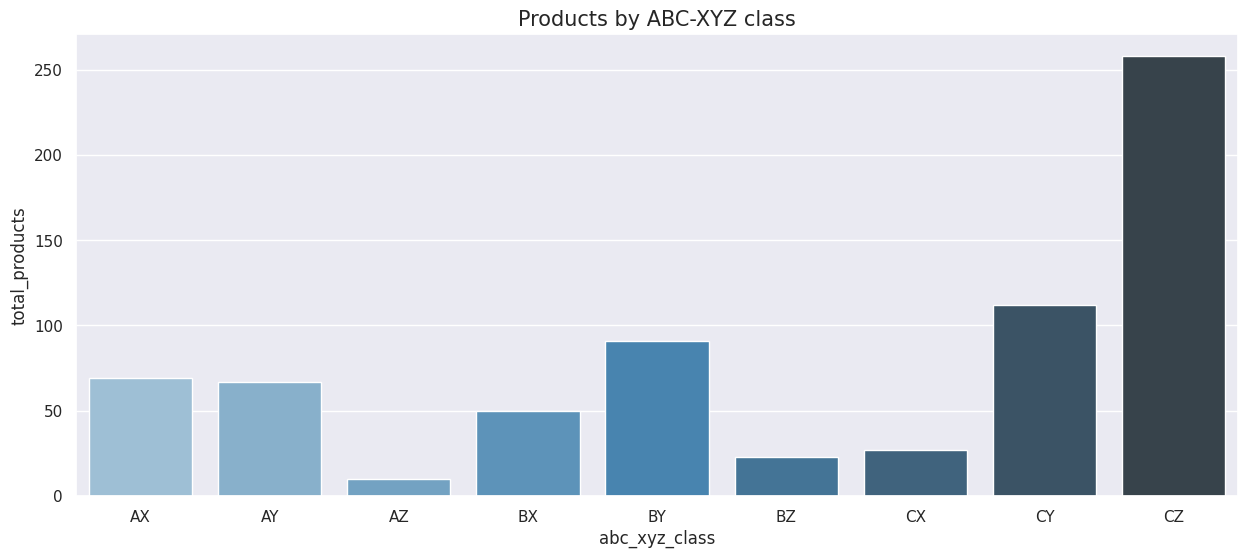

In [44]:
# Кол-вао наименований продуктов в каждом класе
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_products", 
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("Products by ABC-XYZ class",fontsize=15)

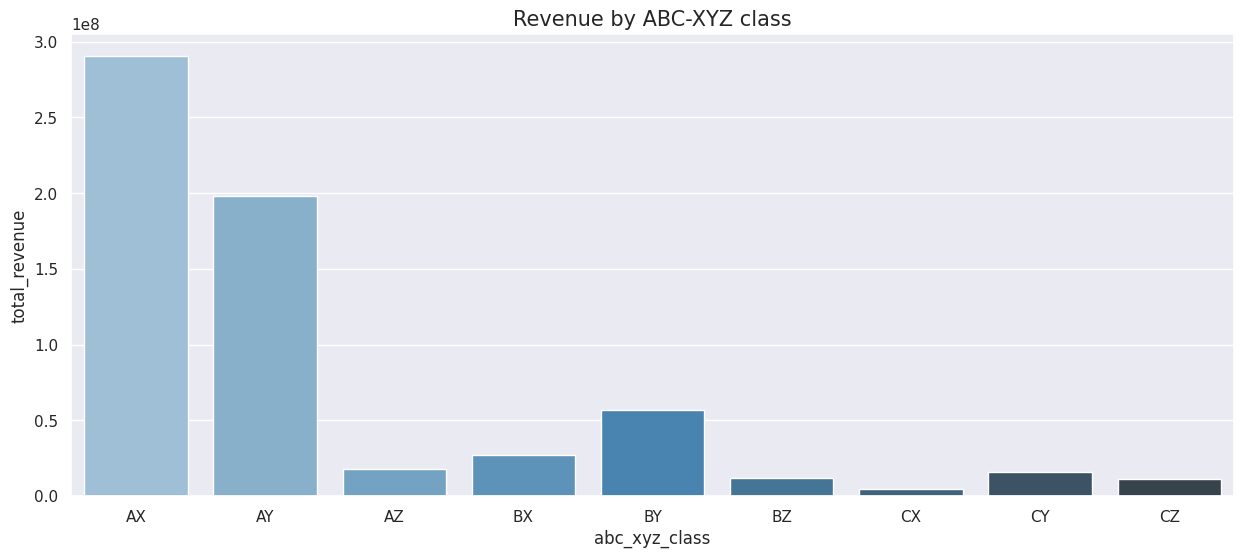

In [45]:
# Прибылт по классам
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_revenue", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Revenue by ABC-XYZ class",fontsize=15)

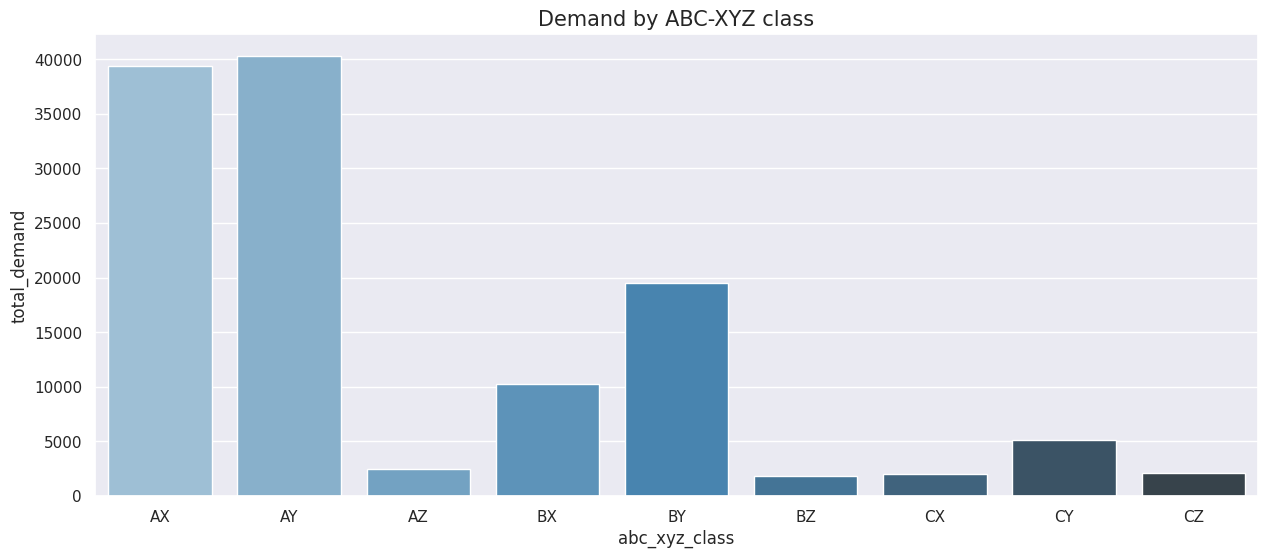

In [46]:
# Общий спрос по классам
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_demand", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Demand by ABC-XYZ class",fontsize=15)

# Сохранение и экспорт в CSV

In [47]:
df_abc_xyz_out = df_abc_xyz[['ProductID', 'abc_class', 'xyz_class']]
df_abc_xyz_out

,ProductID,abc_class,xyz_class
0,475,A,X
1,409,A,Y
2,551,A,Y
3,826,A,X
4,396,A,X
...,...,...,...
702,1330,C,Z
703,2211,C,Z
704,2210,C,Z
705,1003,C,Z


In [48]:
name_out_file = 'df_abc_xyz_out__' + str(input_year) + '.csv'
df_abc_xyz_out.to_csv(name_out_file)

In [49]:
#df_abc_xyz_out_all = df_abc_xyz.copy()
#df_abc_xyz_out_all.to_csv('df_abc_xyz_out_all.csv')

# Понимание классов ABC XYZ

Объединив данные ABC и XYZ, мы создаем девять различных классов. Все классы с префиксом A приносят высокий доход, классы B приносят средний доход, а классы C приносят низкий доход.

Аналогичным образом, классы с суффиксом X имеют устойчивый спрос, их легко прогнозировать и управлять ими. Классы с суффиксом Y имеют переменный, но предсказуемый спрос, поэтому ими сложнее управлять, чем классами X, но все же легко выполнимо. Классы Z самые сложные из всех. Они продаются спорадически и в разных объемах, поэтому их сложнее прогнозировать и сложнее управлять.

AX
Высокая стоимость
Стабильный спрос
Легко прогнозировать
Легко управлять

BX
Среднее значение
Стабильный спрос
Легко прогнозировать
Легко управлять

CX
Низкая стоимость
Стабильный спрос
Легко прогнозировать
Легко управлять

AY
Высокая стоимость
Переменный спрос
Сложнее прогнозировать
Сложнее управлять

BY
Среднее значение стоимости
Переменный спрос
Сложнее прогнозировать
Сложнее управлять

CY
Низкая стоимость
Переменный спрос
Сложнее прогнозировать
Сложнее управлять

AZ
Высокая стоимость
Случайный спрос
Трудно прогнозировать
Трудно управлять

BZ
Среднее значение
Случайный спрос
Трудно прогнозировать
Трудно управлять

CZ
Низкая стоимость
Случайный спрос
Трудно прогнозировать
Трудно управлять

# Подходы к управлению

Самый простой способ избежать дефицита — просто держать больше запасов, увеличивая уровень буферных запасов. У этого есть много преимуществ: вы потеряете меньше продаж, поэтому средняя стоимость продаж и доход будут выше; вы, вероятно, увидите лучшее удержание клиентов и более высокий уровень удовлетворенности, потому что клиенты не уходят куда-либо еще, когда видят, что товара нет в наличии, и вам не нужно будет закупать дорогостоящие запасы для экстренного пополнения и снижать свою прибыль.

Однако владение более крупными запасами имеет и некоторые недостатки: вам придется тратить больше денег на запасы; у вас будет больше капитала, вложенного в запасы; вам понадобится больше места, оборудования и персонала для обработки запасов; расходы на страхование будут расти вместе с оценкой ваших запасов. Поэтому необходим компромисс, который находится где-то посередине.

AX
Автоматическое пополнение
Низкий буфер запасов, JIT или передача партий
Постоянный инвентарь

BX
Автоматическое пополнение
Периодический подсчет
Низкий буфер запасов

CX
Автоматическое пополнение
Периодическая оценка
Низкий буфер

AY
Полуавтоматическое пополнение
Низкий буфер

BY
Полуавтоматическое пополнение
Сезонный буфер, корректируемый вручную

CY
Полуавтоматическое пополнение
Высокий буфер

AZ
Купить на заказ
Нет буфера
Нет в наличии

BZ
Buy to order
Купить на заказ
Нет буфера
Время выполнения указано
Нет в наличии

CZ
Автоматическое пополнение
Высокий буфер
Периодическая проверка

Управление запасами ABC XYZ — это лишь одна из широкого спектра широко используемых систем управления запасами в управлении операциями (включая HML, VED, SDF, SOS, GOLF и FNS), каждая из которых предназначена для решения некоторых конкретных проблем, которые могут возникают с различными типами запасов, включая влияние отсутствия запасов на производство. Подробнее об этом вы можете узнать в статьях ниже.

# Литература

- Aktunc, E.A., Basaran, M., Ari, G., Irican, M. and Gungor, S., 2019. Inventory Control Through ABC/XYZ Analysis. In Industrial Engineering in the Big Data Era (pp. 175-187). Springer, Cham.

- Anonymous, 2020. ABC XYZ Inventory Management, Association of International Certified Professional Accountants.

- Gonzalez, J.L. and González, D., 2010. Analysis of an economic order quantity and reorder point inventory control model for company XYZ.

- Pandya¹, B. and Thakkar, H., 2016. A review on inventory management control techniques: ABC-XYZ analysis. REST Journal on Emerging trends in Modelling and Manufacturing, 2, p.15.

# ИСТОЧНИК

Очень хорошая статья, изумительная. Развернутые пояснения, понятный код и рабочий код.

https://practicaldatascience.co.uk/data-science/how-to-create-an-abc-xyz-inventory-classification-model